# Sieci Neuronowe w TensorFlow

## Przydatne pakiety

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
import tensorflow as tf

## Zbiór danych

W tym ćwiczeniu wykorzystamy zbiór danych przypominający MNIST, lecz przedstawiający proste wzory ubrań: *Fashion MNIST*

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

Fashion MNIST zawiera 70,000 zdjęć w rozmiarze 28x28 pikseli, w tym 60,000 do uczenia i 10,000 do ewaluacji:

In [5]:
print(f'Dane uczace: {train_images.shape}')
print(f'Dane testowe: {test_images.shape}')

Dane uczace: (60000, 28, 28)
Dane testowe: (10000, 28, 28)


Wyrysujmy przykłady z Fashion MNIST

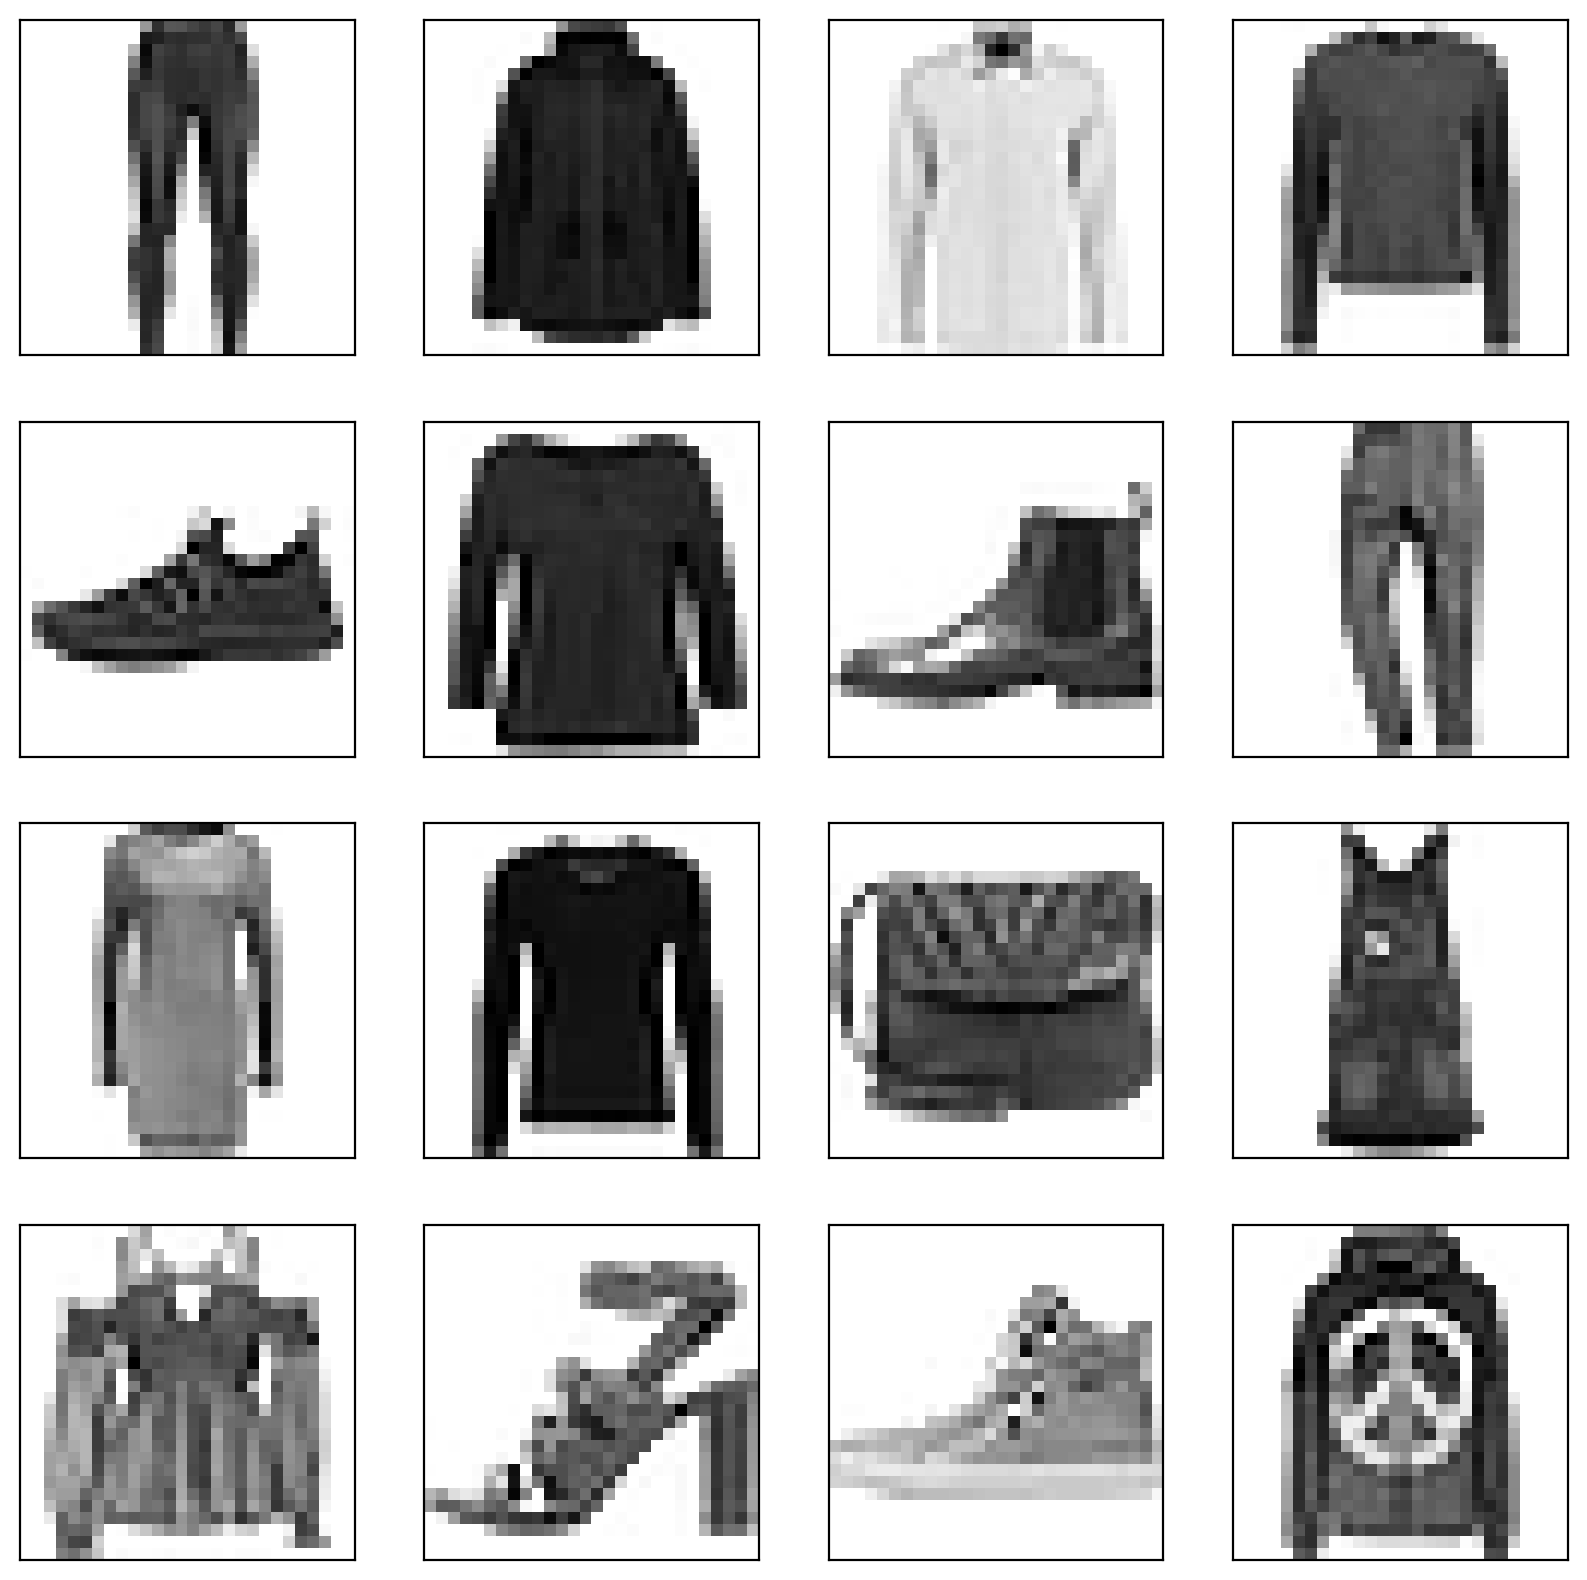

In [6]:
subset = np.random.choice(np.arange(60000), size=16)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[subset[i]], cmap=plt.cm.binary)

plt.show()

Etykiety w Fashion MNIST są zakodowane jako numery klas:

In [7]:
print(f'Etykiety: uczace {train_labels.shape}, testowe: {test_labels.shape}')
print(f'Wybrane etykiety: {train_labels[:10]}')

Etykiety: uczace (60000,), testowe: (10000,)
Wybrane etykiety: [9 0 0 3 0 2 7 2 5 5]


Na potrzeby uczenia sieci neuronowej przekształcimy je do postaci wektorów *one hot*:

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
print(f'Etykiety (one-hot): uczace {train_labels.shape}, testowe: {test_labels.shape}\n')
print(f'Wybrane etykiety (one-hot): {train_labels[:10, :]}')

Etykiety (one-hot): uczace (60000, 10), testowe: (10000, 10)

Wybrane etykiety (one-hot): [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Prosta sieć MLP

Jako pierwszy model do klasyfikacji Fashion MNIST wykorzystamy prostą sieć MLP.

Model ten zbudujemy jako sekwencję warstw. W tym celu wykorzystamy funkcję `tf.keras.Sequential`.
* Pierwsza warstwa (`tf.Flatten`) przekształca dane wejściowe do postaci wektorów. A więc obraz o o rozmiarze `(28, 28)` pikseli zostanie przekształcony w wektor `784` liczb.
* Kolejne dwie warstwy to warstwy w pełni połączone. Każda z nich ma 64 neurony i funkcę aktywacji ReLU.
* Ostatnia warstwa to warstwa w pełni połączona. Ma 10 neuronów i brak funkcji aktywacji (lub inaczej: identycznościową funkcję aktywacji). Jaką rolę pełni ta warstwa w naszy modelu?

In [10]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

Mając stworzony model musimy przygotować algorytm optymalizacyjny i funkcję kosztu.
* Rozwiązujemy problem klasyfikacji wieloklasowej (wieloklasowej regresji logistycznej), więc funkcją kosztu jest entropia krzyżowa.
* Wejściem do tej tunkcji kosztu będą nie prawdopodobieństwa klas, lecz logity (argument `from_logits=True`)

In [11]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
xentropy_loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

Możemy obecnie przygotować nasz model do trenowania - np. ustalić listę parametrów do optymalizacji. W odróżnieniu od poprzedniego laboratorium, nie będziemy tego robić "ręcznie" - wykorzystamy metodę `compile`. Taką metodę posiada każdy model z pakietu Keras.

In [12]:
mlp_model.compile(optimizer=opt, loss=xentropy_loss, metrics=['accuracy'])

Pozostaje zoptymalizować (wytrenować) sieć. Ponownie, nie będziemy implementować pętli optymalizacji "ręcznie", lecz wykorzystamy funkcję `fit` (każdy model Keras ma taką funkcję)

In [13]:
mlp_model.fit(train_images, train_labels, batch_size = 128, epochs=5);

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 2.1422 - accuracy: 0.2297
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7213 - accuracy: 0.5565
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3764 - accuracy: 0.6453
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.1509 - accuracy: 0.6653
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0160 - accuracy: 0.6799


Na koniec możemy oszacować skuteczność modelu na danych uczących.

In [14]:
mlp_model.evaluate(test_images,  test_labels, verbose=2);

313/313 - 1s - loss: 0.9766 - accuracy: 0.6785 - 716ms/epoch - 2ms/step


## Sieć konwolucyjna

Spróbujmy wykorzystać TensorFlow i Keras do implementacji konwolucyjnej sieci neuronowej klasyfikującej zdjęcia Fashion MNIST.

Sieć konwolucyjna oczekuje danych wejściowych w postaci: `liczba_przykładów x liczba_kanałów (kolorów) x szerokość x wysokość`. Nasze dane mają postać: `liczba_przykładów x szerokość x wysokość` -  nie mają więc informacji o kanałach.

Korzystając z metod `reshape` oraz `transpose` zmień kształt macierzy `train_images` i `test_images` do wymaganej postaci.

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [17]:
print(f'Dane uczace: {train_images.shape}')
print(f'Dane testowe: {test_images.shape}')

Dane uczace: (60000, 28, 28, 1)
Dane testowe: (10000, 28, 28, 1)


Zdefiniuj nowy model uczący się - konwolucyjną sieć neuronową.

1. Sieć powinna mieć dwie warstwy konwolucyjne. Każda z nich powinna mieć:
  * Kernel konwolucji o rozmiarze (3, 3) przesuwany co 2 piksele.
  * Padding na brzegach zdjęcia o takim rozmiarze, by kernel mógł być przyłożony do każdego piksela zdjęcia. Zapewnia to argument `padding='same'`.
  * Funkcję aktywacji ReLU.

1. Pierwsza warstwa konwolucyjna powinna mieć 4 kanały wyjściowe a druga 8 kanałów wyjściowych.

1. Po warstwach konwolucyjnych powinny znajdować się dwie dodatkowe warstwy pozwalające wyliczyć wejście do funkcji kosztu (logity).

In [18]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

Obecnie możemy przygotować algorytm optymalizujący oraz funkcję kosztu:

In [19]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
xentropy_loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

Przygotować model do trenowania:

In [20]:
cnn_model.compile(optimizer=opt, loss=xentropy_loss, metrics=['accuracy'])

Wytrenować i oszacować skuteczność:

In [21]:
cnn_model.fit(train_images, train_labels, batch_size=128, epochs=5);

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 1.3588 - accuracy: 0.5470
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6963 - accuracy: 0.7481
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6206 - accuracy: 0.7749
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5720 - accuracy: 0.7951
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.8048


In [22]:
cnn_model.evaluate(test_images,  test_labels, verbose=2);

313/313 - 1s - loss: 0.5354 - accuracy: 0.8112 - 872ms/epoch - 3ms/step
